In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
import pydotplus

import warnings
warnings.filterwarnings("ignore")

In [3]:
Past_data = pd.read_excel('C:/Users/karan/Desktop/Projects/Datas/Past hires 2.xlsx')

In [4]:
Past_data.head()

,Education,Top-tier school,Interned,Hired
0,CS,N,N,N
1,ME,N,N,Y
2,EE,N,N,N
3,AE,Y,N,Y
4,IS,Y,N,N


In [5]:
Past_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Education        13 non-null     object
 1   Top-tier school  13 non-null     object
 2   Interned         13 non-null     object
 3   Hired            13 non-null     object
dtypes: object(4)
memory usage: 548.0+ bytes


In [6]:
Past_data.isnull().sum()

Education          0
Top-tier school    0
Interned           0
Hired              0
dtype: int64

In [7]:
Past_data.duplicated().sum()

np.int64(0)

In [8]:
label = LabelEncoder()
Past_data['Education'] = label.fit_transform(Past_data['Education'])
Past_data['Top-tier school'] = label.fit_transform(Past_data['Top-tier school'])
Past_data['Interned'] = label.fit_transform(Past_data['Interned'])

In [9]:
x = Past_data.drop(columns  = ['Hired'])
y = Past_data['Hired']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

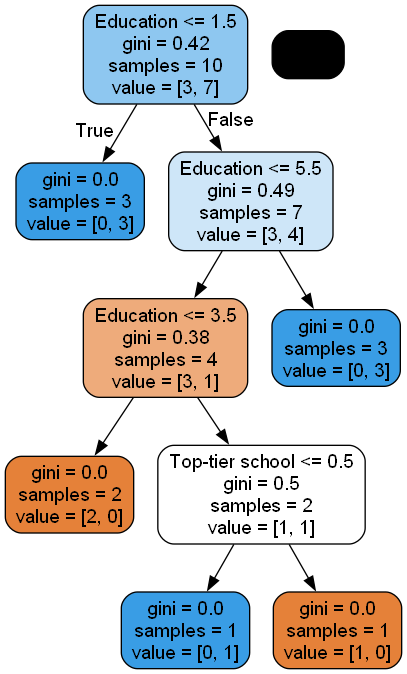

In [11]:
dot_data = export_graphviz(model, out_file=None, feature_names=X_train.columns, rounded =True, proportion = False, precision = 2, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [12]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy: ", accuracy)
print("classification_report: ", classification_rep)
print("confusion Matrix: ", conf_matrix)

Accuracy:  0.6666666666666666
classification_report:                precision    recall  f1-score   support

           N       0.00      0.00      0.00         1
           Y       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

confusion Matrix:  [[0 1]
 [0 2]]


In [13]:
new = [[0,0,1]]
y_pred_new = model.predict(new)
y_pred_new[0]

'Y'